# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Carlos Dhali Tejeda Tapia

- ID: A00344820

- My carreer: Ingeniería en Tecnologías Computacionales


# Importing libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [8]:
# Cargar el dataset
dataset_path = "/content/sample_data/A00344820_X.csv"
df = pd.read_csv(dataset_path)

# Mostrar información general del dataset
print("Información general del dataset:")
print(df.info())


# Eliminar la columna innecesaria
df.drop(columns=["Unnamed: 0"], inplace=True)

# Verificar valores nulos
print("\\nValores nulos en el dataset:")
print(df.isnull().sum())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  504 non-null    int64  
 1   x1          504 non-null    float64
 2   x2          504 non-null    float64
 3   x3          504 non-null    float64
 4   x4          504 non-null    float64
 5   x5          504 non-null    float64
 6   x6          504 non-null    float64
 7   x7          504 non-null    float64
 8   x8          504 non-null    float64
 9   x9          504 non-null    float64
 10  x10         504 non-null    float64
 11  x11         504 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 47.4 KB
None
\nValores nulos en el dataset:
Unnamed: 0    0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
x9            0
x10           0
x11           0
dtype: i

## b) Data managment


Print the first 7 rows

In [11]:
print("\\nPrimeras filas del dataset:")
print(df.head(7))

\nPrimeras filas del dataset:
   Unnamed: 0        x1        x2         x3         x4        x5        x6  \
0           0  6.605901 -5.136711 -11.810607   3.555068  3.480965  2.682949   
1           1  2.526510  7.689042   5.529593  -0.138878  7.227256  0.582487   
2           2  3.118838  9.351934  10.831348  -0.209434  7.068520 -1.112202   
3           3  3.389743 -5.643170 -10.662906  -0.797676  5.797731  0.884046   
4           4  3.557730 -5.401090  -9.361853   0.223442  4.089711  0.143160   
5           5 -1.692370 -7.381346  -5.665026   8.175928 -1.881706 -3.374428   
6           6 -6.874221 -3.837329  -5.759057  11.233216 -0.206121 -4.387931   

         x7        x8         x9       x10        x11  
0 -4.572671 -4.973593 -13.467406  1.900813 -10.519085  
1  2.663012  6.068036  -5.957050  3.845721   7.899457  
2  0.386196  5.129316  -4.569463 -0.102008   8.544636  
3 -8.385724 -9.289728  -8.548838  1.790971  -8.089633  
4 -5.803741 -9.906876 -11.240660  3.883296 -12.139926  
5

Print the last 4 rows

In [12]:
print(df.tail(4))

     Unnamed: 0        x1        x2         x3        x4        x5        x6  \
500         500 -2.790401 -4.330911  -2.794110  5.168998 -1.268775 -7.773055   
501         501 -1.665307  7.736939   7.751888  3.562174  9.844608  1.744976   
502         502  2.172664 -5.181373 -10.713883 -1.470704  2.368557  1.841237   
503         503  2.357920  9.935531   6.163877  3.976381  9.881237  3.234686   

           x7         x8        x9       x10        x11  
500 -7.807849  -2.871769 -3.948279  4.090336   9.067198  
501  0.269548   4.768858 -6.160670  3.730494   3.251816  
502 -9.761406 -12.281035 -4.922981  5.024157 -11.194181  
503  5.047401   4.725720  2.414147 -4.597127   8.056264  


How many rows and columns are in your data?

Use the `shape` method


In [14]:
print(df.shape)

(504, 12)


Print the name of all columns

Use the `columns` method

In [16]:
print(df.columns)

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11'],
      dtype='object')


What is the data type in each column

Use the `dtypes` method

In [17]:
print(df.dtypes)

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
dtype: object


What is the meaning of rows and columns?

Your responses here

1. Las filas representan observaciones o registros en el dataset.

2. Las columnas representan variables o atributos de cada observación.

...



Print a statistical summary of your columns


In [66]:
# Descripción estadística de las variables
print("\\nDescripción estadística:")
print(df.describe())

\nDescripción estadística:
       unnamed: 0          x1          x2          x3          x4          x5  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean   251.500000    2.428209   -0.272580   -1.759478    2.550033    3.278094   
std    145.636534    4.101709    6.375903    7.204133    4.944325    4.173548   
min      0.000000   -8.641123  -11.337263  -14.940266   -6.592768   -5.503332   
25%    125.750000   -0.191973   -6.032216   -6.612350   -1.307024    0.034638   
50%    251.500000    3.094760   -1.300143   -3.306460    1.623051    2.509614   
75%    377.250000    5.338082    5.615687    2.174771    6.158863    6.271346   
max    503.000000   12.591075   13.303158   14.124067   14.971838   13.842756   

               x6          x7          x8          x9         x10     cluster  
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000  
mean    -2.281362   -5.333941   -2.477702   -2.828145    1.782396    0.998016  
std

1. What is the minumum and maximum values of each variable:

2. What is the mean and standar deviation of each variable:

3. What the 25%, 50% and 75% represent?:

In [18]:
# Respuestas sobre estadística
print("\n1. Minimum and maximum values of each variable:")
print(df.min())
print(df.max())

print("\n2. Mean and standard deviation of each variable:")
print(df.mean())
print(df.std())

print("\n3. The 25%, 50% and 75% represent quartiles of the data distribution:")
print("   - 25%: Primer cuartil, indica el valor por debajo del cual está el 25% de los datos.")
print("   - 50%: Mediana, indica el valor central de la distribución.")
print("   - 75%: Tercer cuartil, indica el valor por debajo del cual está el 75% de los datos.")


1. Minimum and maximum values of each variable:
Unnamed: 0     0.000000
x1            -8.641123
x2           -11.337263
x3           -14.940266
x4            -6.592768
x5            -5.503332
x6           -13.487287
x7           -13.417754
x8           -14.688524
x9           -13.467406
x10           -7.477710
x11          -14.084038
dtype: float64
Unnamed: 0    503.000000
x1             12.591075
x2             13.303158
x3             14.124067
x4             14.971838
x5             13.842756
x6              6.414530
x7              5.254498
x8              9.653962
x9             13.808660
x10            10.448917
x11            12.515117
dtype: float64

2. Mean and standard deviation of each variable:
Unnamed: 0    251.500000
x1              2.428209
x2             -0.272580
x3             -1.759478
x4              2.550033
x5              3.278094
x6             -2.281362
x7             -5.333941
x8             -2.477702
x9             -2.828145
x10             1.782396
x11     

Rename the columns using the same name with capital letters

In [63]:
df.columns = [col.upper() for col in df.columns]
print("\nColumnas en mayúsculas:")
print(df.columns)


Columnas en mayúsculas:
Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'CLUSTER'],
      dtype='object')


Rename the columns to their original names

In [65]:
df.columns = [col.lower() for col in df.columns]
print("\nColumnas restauradas:")
print(df.columns)


Columnas restauradas:
Index(['unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'cluster'],
      dtype='object')


Use two different alternatives to get one of the columns

In [21]:
print("\nAcceder a una columna de dos formas diferentes:")
print(df[df.columns[1]])  # Acceso por índice
print(df.iloc[:, 1])  # Acceso con iloc


Acceder a una columna de dos formas diferentes:
0      6.605901
1      2.526510
2      3.118838
3      3.389743
4      3.557730
         ...   
499    3.118768
500   -2.790401
501   -1.665307
502    2.172664
503    2.357920
Name: X1, Length: 504, dtype: float64
0      6.605901
1      2.526510
2      3.118838
3      3.389743
4      3.557730
         ...   
499    3.118768
500   -2.790401
501   -1.665307
502    2.172664
503    2.357920
Name: X1, Length: 504, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [22]:
print("\nSlice del dataset:")
print(df.iloc[62:73, 1:3])


Slice del dataset:
          X1         X2
62  3.472551   8.055305
63  4.951719   3.469765
64 -6.046205  -3.498410
65  4.371534   7.090948
66  7.107580   0.967789
67 -2.707472  -5.183250
68  0.148386  10.280866
69  2.080026   2.893922
70  3.326276   9.184423
71  1.381950   7.440824
72  2.625853  -7.815890


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [23]:
print("\nValores nulos y no nulos en segunda y tercera columna:")
print(df.iloc[:, 1].isnull().sum(), df.iloc[:, 1].notnull().sum())
print(df.iloc[:, 2].isnull().sum(), df.iloc[:, 2].notnull().sum())


Valores nulos y no nulos en segunda y tercera columna:
0 504
0 504


Discard the last column


In [24]:
df = df.iloc[:, :-1]
print("\nDataset después de eliminar la última columna:")
print(df.head())



Dataset después de eliminar la última columna:
   Unnamed: 0        X1        X2         X3        X4        X5        X6  \
0           0  6.605901 -5.136711 -11.810607  3.555068  3.480965  2.682949   
1           1  2.526510  7.689042   5.529593 -0.138878  7.227256  0.582487   
2           2  3.118838  9.351934  10.831348 -0.209434  7.068520 -1.112202   
3           3  3.389743 -5.643170 -10.662906 -0.797676  5.797731  0.884046   
4           4  3.557730 -5.401090  -9.361853  0.223442  4.089711  0.143160   

         X7        X8         X9       X10  
0 -4.572671 -4.973593 -13.467406  1.900813  
1  2.663012  6.068036  -5.957050  3.845721  
2  0.386196  5.129316  -4.569463 -0.102008  
3 -8.385724 -9.289728  -8.548838  1.790971  
4 -5.803741 -9.906876 -11.240660  3.883296  


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

El dataset cuenta con 12 columnas y 504 filas, una de las columnas solo tiene números que cuentan el número de filas, la columna "unnamed", y las otras 11 columnas cuentan con valores variados, por lo que se ve algunas con valores negativos y positivos y no son valores muy grandes, el mayor que he visto hasta ahora ha sido de -13. También cabe destacar que todos los valores tienen números decimales.



## c) Data visualization

Plot in the histogram of one of the variables

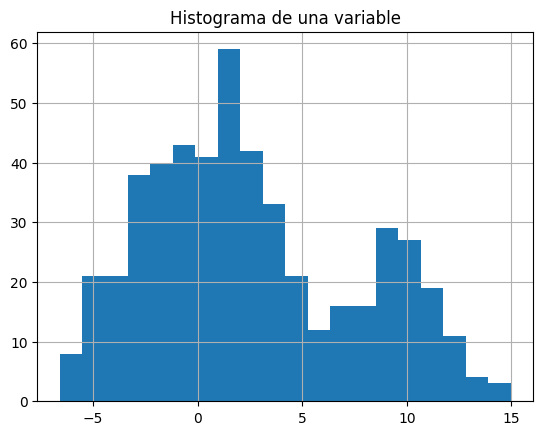

In [54]:
df.iloc[:,4].hist(bins=20)
plt.title("Histograma de una variable")
plt.show()

Plot in the same figure the histogram of two variables



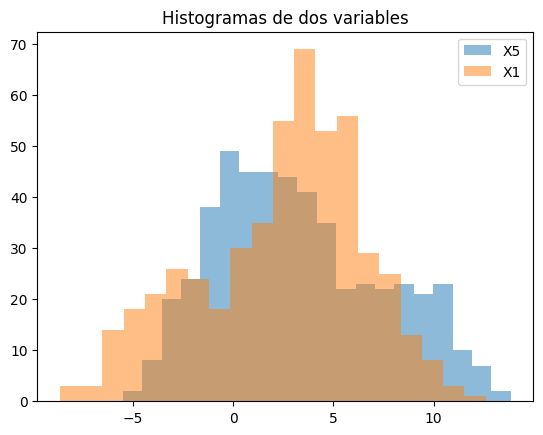

In [57]:
plt.hist(df.iloc[:, 5], bins=20, alpha=0.5, label=df.columns[5])
plt.hist(df.iloc[:, 1], bins=20, alpha=0.5, label=df.columns[1])
plt.legend()
plt.title("Histogramas de dos variables")
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the boxplot of one of the variables

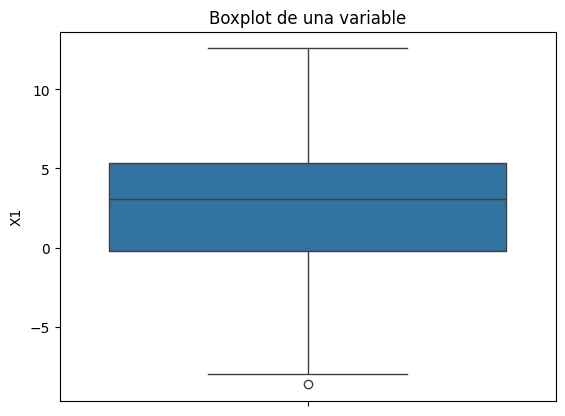

In [53]:
sns.boxplot(y=df.iloc[:, 1])
plt.title("Boxplot de una variable")
plt.show()

Plot in the same figure the boxplot of two variables

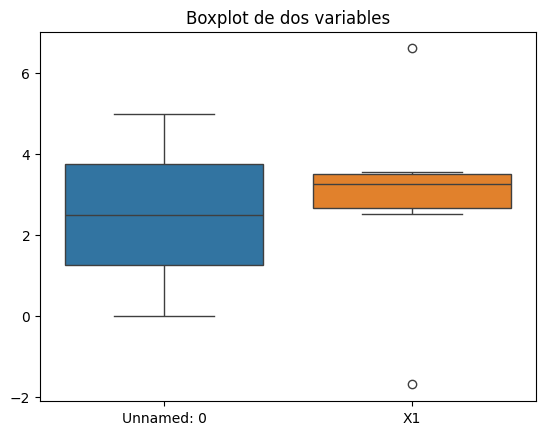

In [61]:
sns.boxplot(data=df.iloc[:6, :2])
plt.title("Boxplot de dos variables")
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Podemos ver que en muchos de los valores de la variable puede haber solapamiento, las diferencias no son muy grandes ya que al ser valores que no se diferencían mucho entre si permite que la mayoría se mantenga en el mismo rango, hay valores outliers en algunas de las variables pero de ahí en fuera soy parecidas.

Plot the scatter plot between all pair of variables

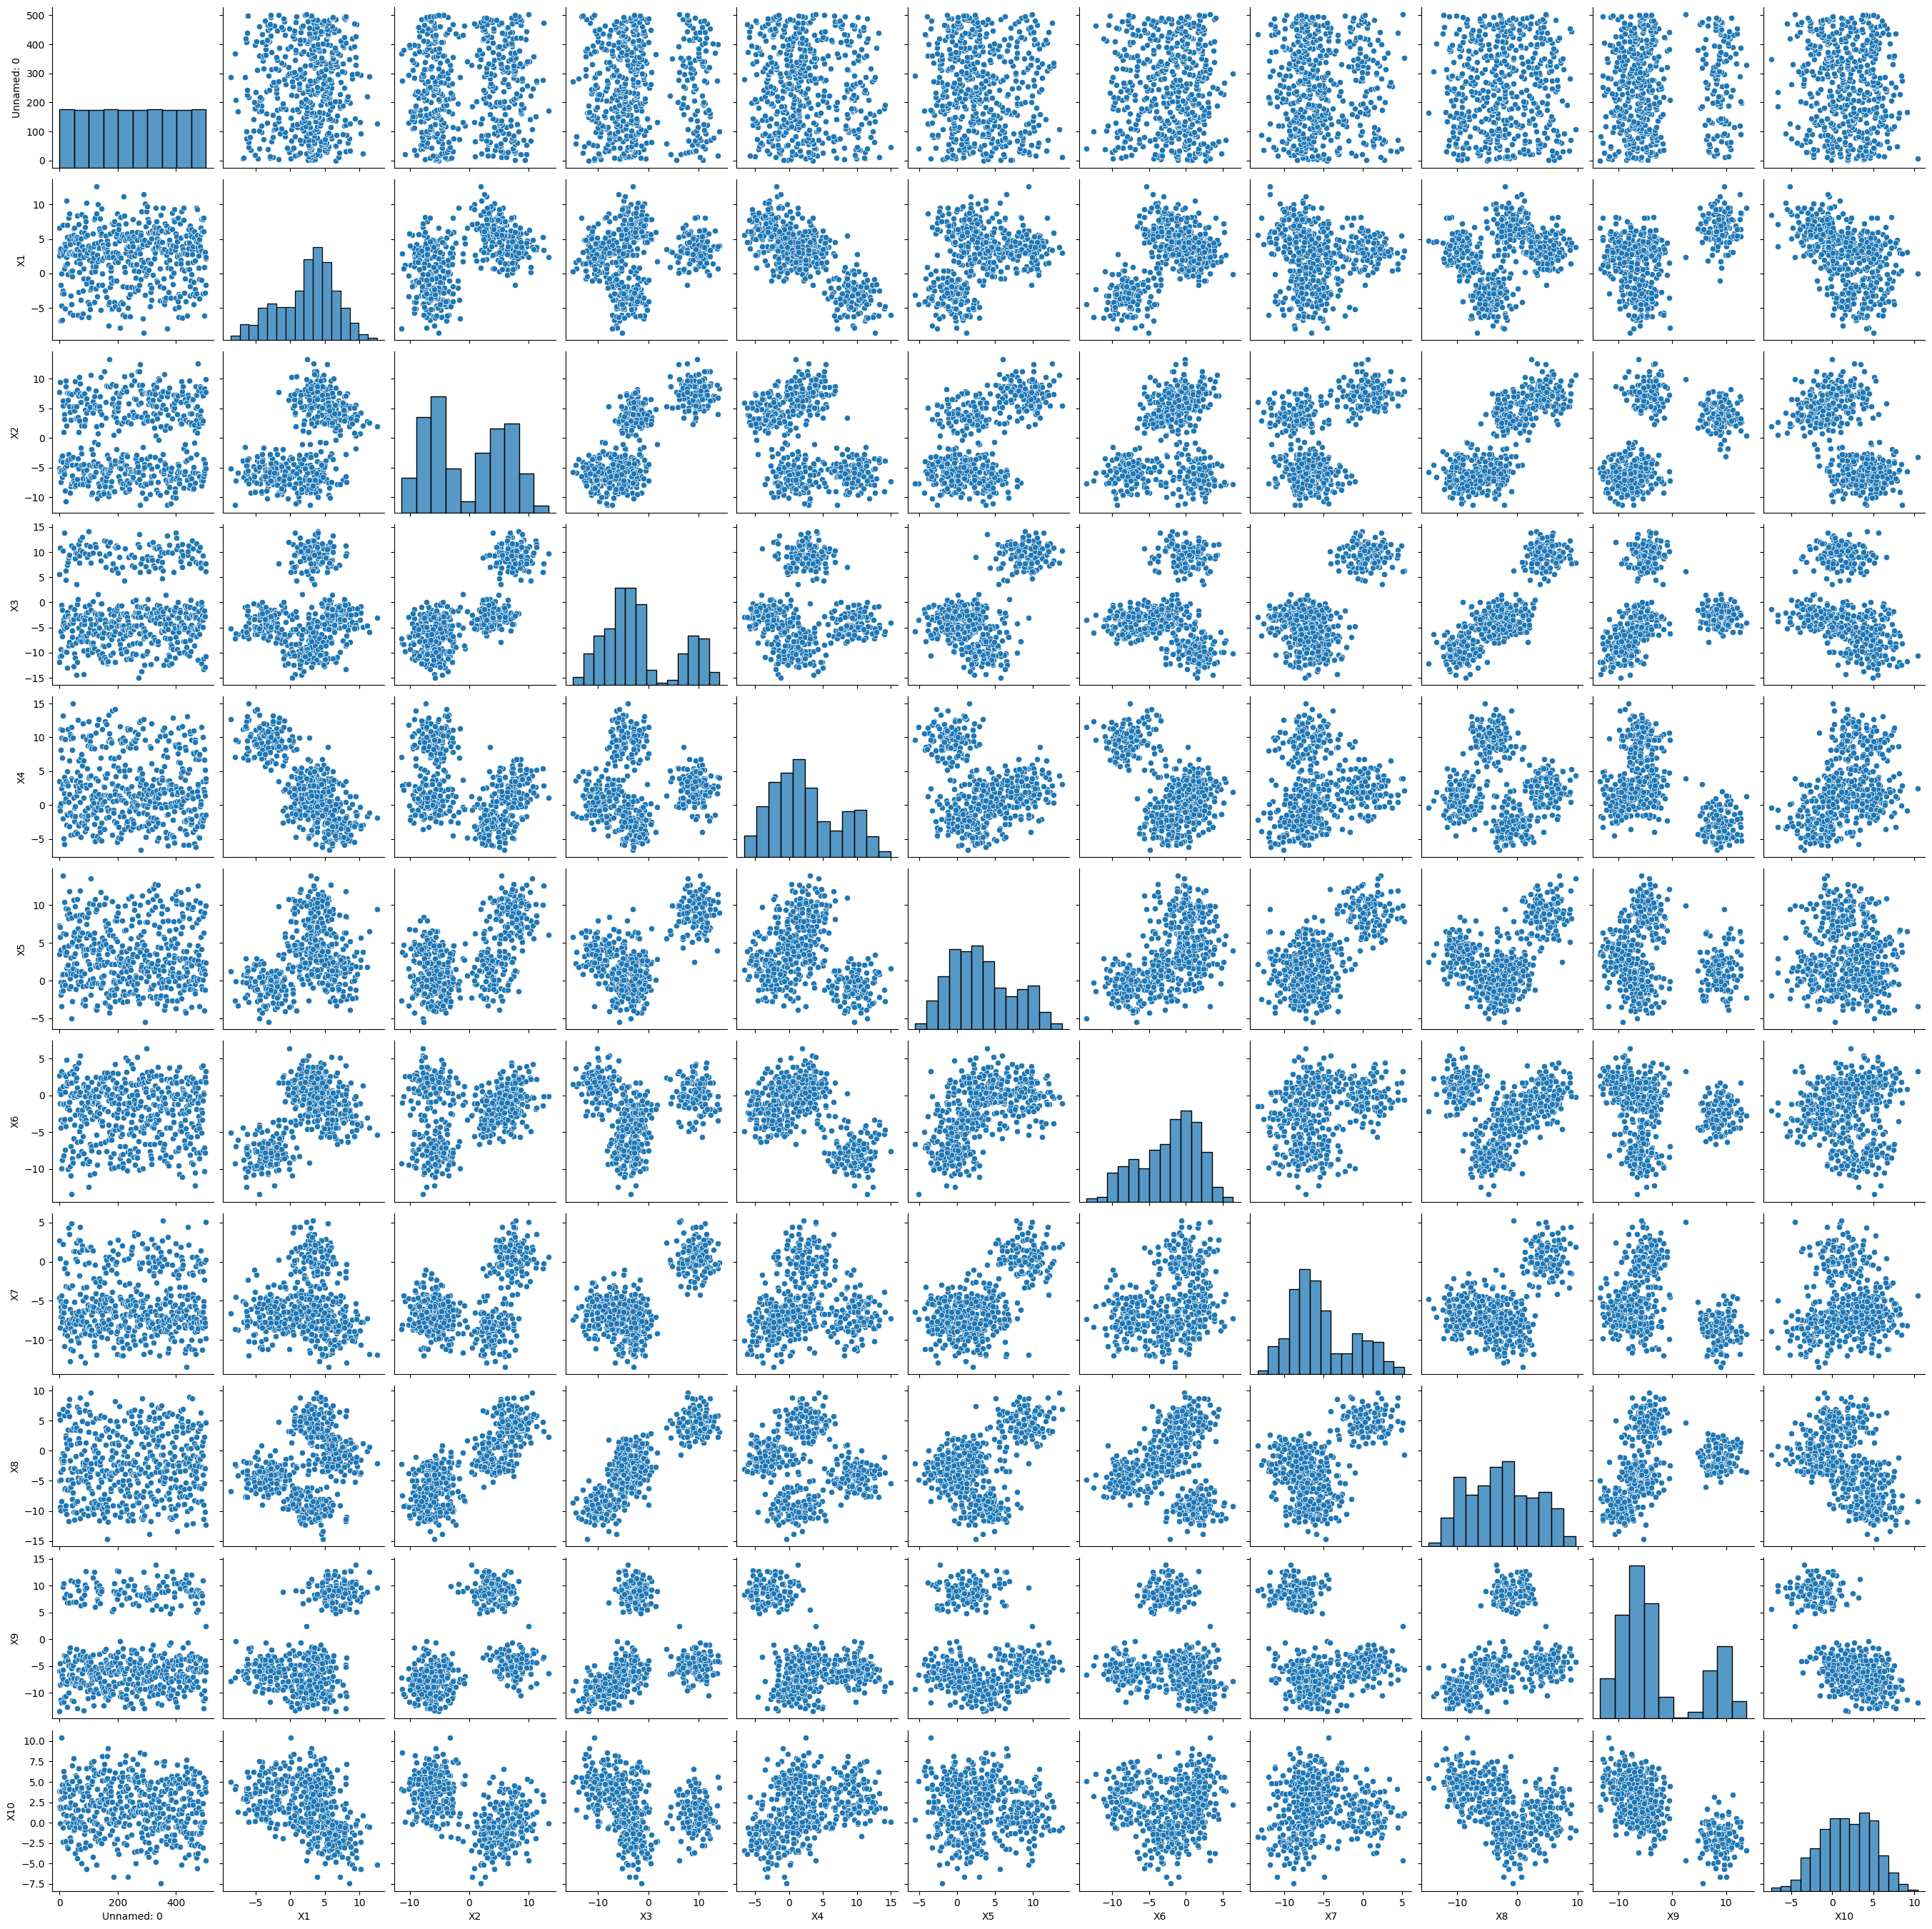

In [31]:
sns.pairplot(df)
plt.show()

## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

Print the number associated to each cluster

In [33]:
print("\nNúmero de clusters:")
print(df['Cluster'].value_counts())


Número de clusters:
Cluster
1    169
0    168
2    167
Name: count, dtype: int64


Print the centroids

In [34]:
print("\nCentroides:")
print(kmeans.cluster_centers_)


Centroides:
[[ 2.50500000e+02  2.34520935e+00 -1.22091691e-01 -1.76232296e+00
   2.61900774e+00  2.93542155e+00 -2.41011477e+00 -5.29946599e+00
  -2.47011188e+00 -2.83630229e+00  1.87351210e+00]
 [ 4.19000000e+02  2.52747037e+00  8.65691837e-02 -1.30781241e+00
   2.30034031e+00  3.21648434e+00 -2.33680517e+00 -5.34059102e+00
  -2.22602852e+00 -2.01536917e+00  1.42912544e+00]
 [ 8.30000000e+01  2.41125434e+00 -7.87420581e-01 -2.21369015e+00
   2.73332840e+00  3.68516609e+00 -2.09573049e+00 -5.36189420e+00
  -2.74002592e+00 -3.64244818e+00  2.04823452e+00]]


Print the intertia metric

In [35]:
print("\nInercia del modelo:")
print(kmeans.inertia_)


Inercia del modelo:
1323427.3438564637


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

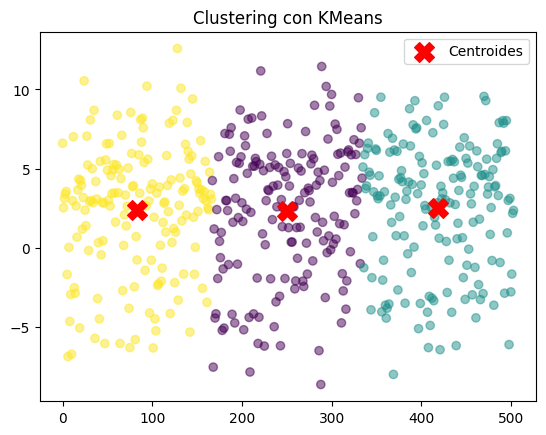

In [36]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.legend()
plt.title("Clustering con KMeans")
plt.show()

### Questions

Provides a detailed description of your results

Your response:

El análisis nos sugiere que los datos pueden dividirse en tres grupos relativamente balanceados, pero sin una separación drástica. La diferencia en los centroides sugiere que hay patrones distintos entre los grupos, aunque la cercanía de algunos valores indica que los clusters pueden estar solapados en ciertas dimensiones.

Para evaluar mejor el modelo, creo que lo mejor sería complementar el análisis con métricas adicionales como el silhouette score, que mide qué tan bien se agrupan los puntos dentro de sus clusters en comparación con los otros clusters.

## d) Elbow plot

Compute the Elbow plot

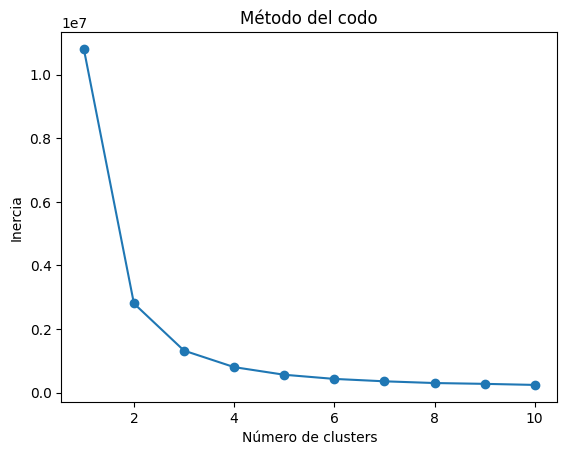

In [37]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.iloc[:, :-1])
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:
El mejor número de clusters muy probablemente sea k=2 debido a que desde el 0 al 2 hay un crecimiento exponencial, mientras que conforme va avanzando de 2 a 10 las diferencias son mucho menores y no valdría tanto la pena realizar más trabajo.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:

Mi supocisión al inicio fue aleatoria, simplemente elegí un número para probar, pero ahora viendo las gráficas de los clusters veo que la cantidad es correcta o por lo menos está bastante cerca de serlo ya que entre 2 y 3 es donde se encuentra el punto adecuado de clusters k.

# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [38]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

digits = load_digits()
data = digits.data
labels = digits.target

2) Plot some of the observations (add in the title the label/digit of that obserbation)

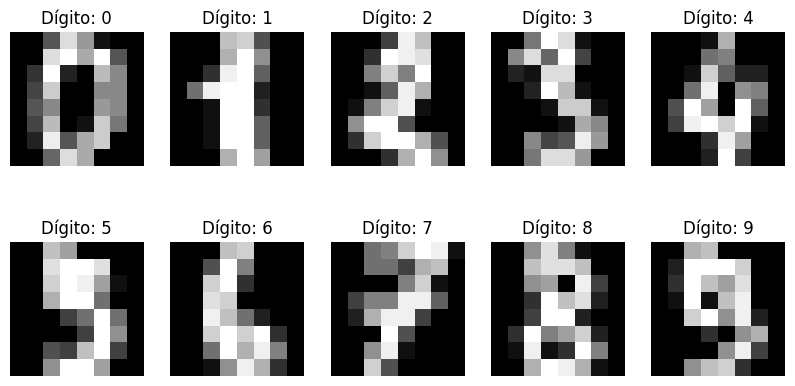

In [39]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label in zip(axes.ravel(), digits.images, labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Dígito: {label}')
    ax.axis('off')
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [40]:
km_all = KMeans(n_clusters=10, random_state=42).fit(data)
km_1row = KMeans(n_clusters=10, random_state=42).fit(data[:, :8])
km_4row = KMeans(n_clusters=10, random_state=42).fit(data[:, 24:32])
km_8row = KMeans(n_clusters=10, random_state=42).fit(data[:, 56:64])

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

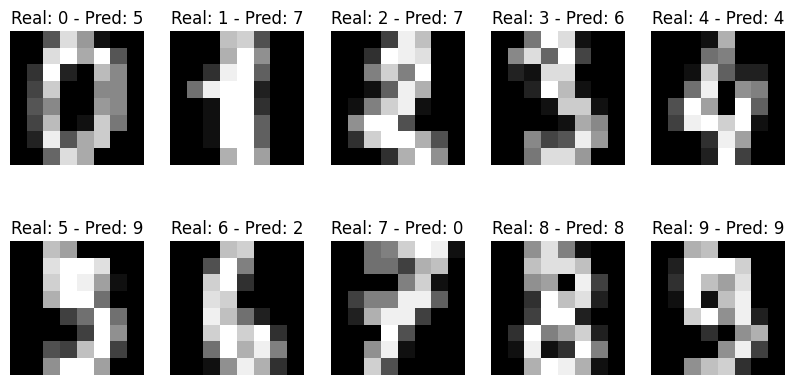

In [41]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label, pred in zip(axes.ravel(), digits.images, labels, km_all.labels_):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Real: {label} - Pred: {pred}')
    ax.axis('off')
plt.show()

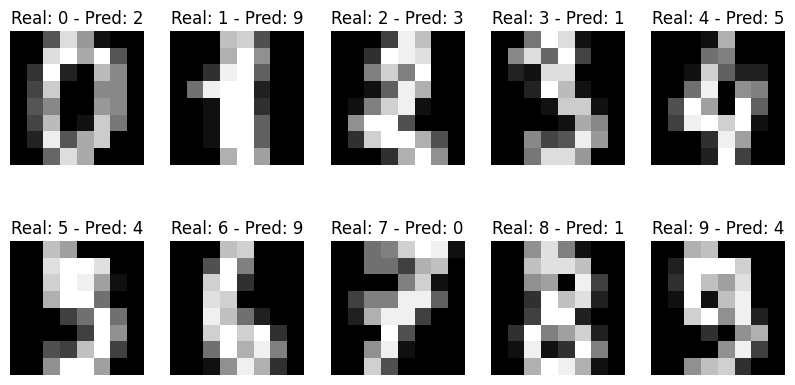

In [51]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label, pred in zip(axes.ravel(), digits.images, labels, km_1row.labels_):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Real: {label} - Pred: {pred}')
    ax.axis('off')
plt.show()

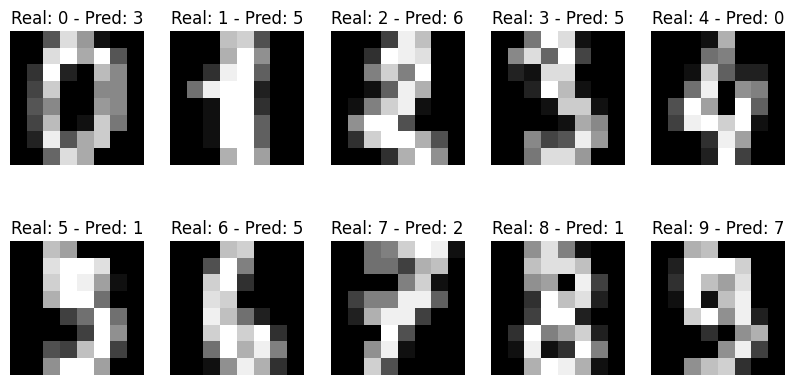

In [52]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label, pred in zip(axes.ravel(), digits.images, labels, km_8row.labels_):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Real: {label} - Pred: {pred}')
    ax.axis('off')
plt.show()

5) Compute the Elbow plot

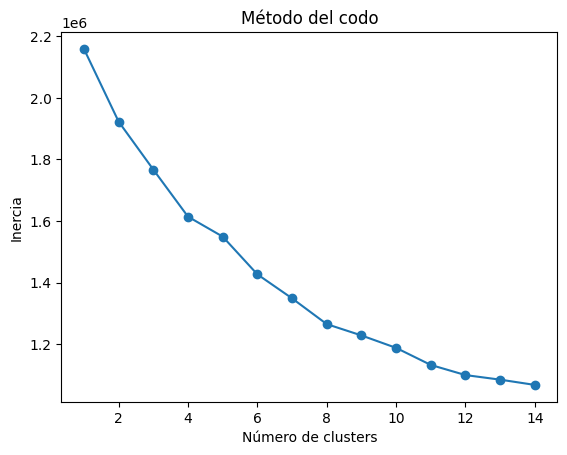

In [68]:
inertias = []
for k in range(1, 15):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    inertias.append(km.inertia_)

plt.plot(range(1, 15), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

Como podemos ver en los resultados debido a que estos clasificadores están trabajando con imagenes es obvio que mientras más información tengan de la imagén la clasificación y accuracy será mejor.

Como vemos en la comparación de los valores reales contra los valores predichos, el clasificador que utilizó todos los pixeles de la imagén acierta en todas mientras que los otros clasificadores lo hacen muy mal.

# PART 3
## Do classification using the "digits" dataset

In [45]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

1) Load the dataset from "sklearn.datasets"

In [43]:
digits = load_digits()
X = digits.data
y = digits.target

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

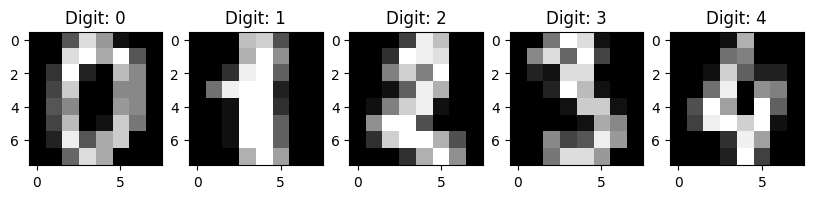

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Digit: {y[i]}")
plt.show()

3) Split the dataset in train and test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [47]:
clf_all = SVC().fit(X_train, y_train)
clf_1col = SVC().fit(X_train[:, :8], y_train)
clf_4col = SVC().fit(X_train[:, 24:32], y_train)
clf_8col = SVC().fit(X_train[:, 56:64], y_train)

5) Make predictions (use the test set)

In [48]:
y_pred_all = clf_all.predict(X_test)
y_pred_1col = clf_1col.predict(X_test[:, :8])
y_pred_4col = clf_4col.predict(X_test[:, 24:32])
y_pred_8col = clf_8col.predict(X_test[:, 56:64])

6) Compute performance metrics

In [49]:
print("\nAccuracy All Features:", accuracy_score(y_test, y_pred_all))
print("\nClassification Report All Features:\n", classification_report(y_test, y_pred_all))

print("\nAccuracy 1st Column:", accuracy_score(y_test, y_pred_1col))
print("\nClassification Report 1st Column:\n", classification_report(y_test, y_pred_1col))

print("\nAccuracy 4th Column:", accuracy_score(y_test, y_pred_4col))
print("\nClassification Report 4th Column:\n", classification_report(y_test, y_pred_4col))

print("\nAccuracy 8th Column:", accuracy_score(y_test, y_pred_8col))
print("\nClassification Report 8th Column:\n", classification_report(y_test, y_pred_8col))


Accuracy All Features: 0.9861111111111112

Classification Report All Features:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


Accuracy 1st Column: 0.40555555555555556

Classification Report 1st Column:
               precision    recall  f1-score   support

           0       0.23    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

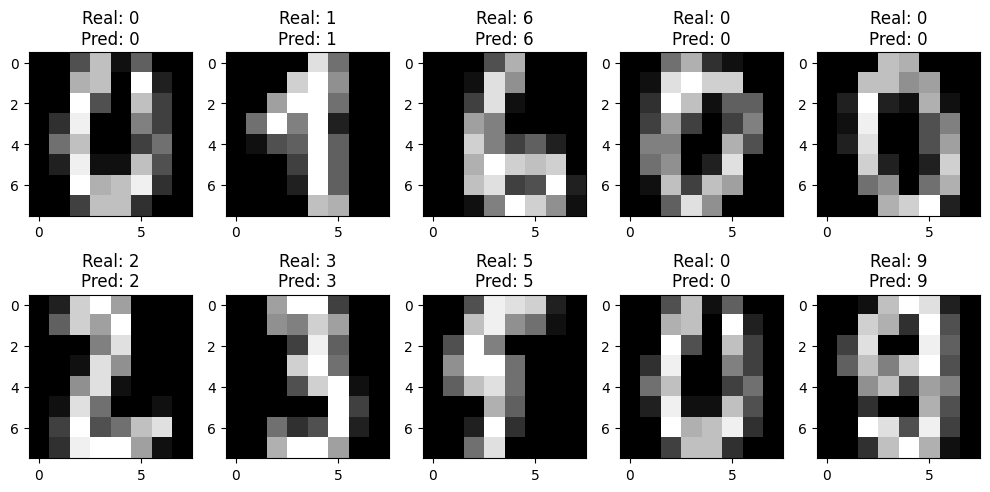

In [69]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    img_index = np.random.randint(len(X_test))
    ax.imshow(X_test[img_index].reshape(8, 8), cmap='gray')
    ax.set_title(f"Real: {y_test[img_index]}\nPred: {y_pred_all[img_index]}")
plt.tight_layout()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

El modelo se comporta mucho mejor en el ClassifierAll con un .98 de accuracy y el segundo mejor es el Classifier4col, esto es debido a que mientras más información de los pixeles obtenga el clasificador mejor será su rendimiento ya que este está tratando con imagenes.

Los clasificadores con una sola columna sufrieron demasiado en el accuracy como se puede ver en los resultados y esto hace sentido y por lo visto en la cuarta columna de las imagenes se encuentra información más relevante para el clasificador que en las otras columnas.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

En este análisis, fuimos viendo cómo se relacionan las variables entre sí usando diferentes herramientas. Primero, hice visualizaciones como boxplots, histogramas y scatter plots para detectar patrones y entender mejor la distribución de los datos. Luego, cuando se aplicó K-Means, analizamos cómo ciertas variables influían en la forma en que los datos se agrupaban en distintos clusters. Todo esto me ayudó a darme cuenta de qué factores eran los que tenían más peso y cómo interactuaban entre ellos dentro del fenómeno que estudiamos.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Para modelar los datos, se usó K-means, que me permitió agruparlos en diferentes categorías sin que nadie le tuviera que decir primero qué era lo que tenía que buscar. Se probaron distintos números de clusters para ver cuál tenía más sentido, y se analizaron métricas como la inercia para encontrar el mejor ajuste. También interpreté los centroides de los grupos para entender qué los diferenciaba. Todo este proceso me ayudó a construir un modelo que explicara mejor la estructura de los datos y nos diera información útil para tomar decisiones.